In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from keras import models,layers
from keras.applications import VGG16
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Activation
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from keras.optimizers import Adam
from keras.preprocessing.image import img_to_array, array_to_img
from skimage.transform import resize

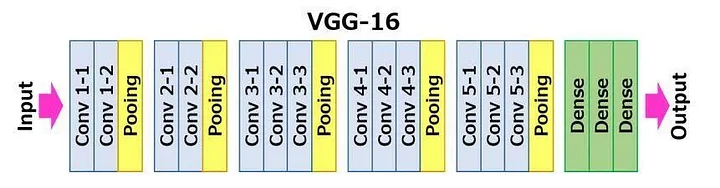

In [4]:
# Load MNIST data
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [5]:
# Resize Data
train_images_resized = np.array([resize(img_to_array(image), (32, 32, 3)) for image in train_images])
test_images_resized = np.array([resize(img_to_array(image), (32, 32, 3)) for image in test_images])


In [6]:
# Normalize pixel values to be between 0 and 1
train_images_rgb = train_images_resized.astype('float32') / 255
test_images_rgb = test_images_resized.astype('float32') / 255

In [7]:
train_images_rgb.shape

(60000, 32, 32, 3)

In [8]:
# Convert labels to one-hot encoding
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)


In [9]:
model = models.Sequential()

model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(4096, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))  # Adding Dropout for regularization
model.add(layers.Dense(4096, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

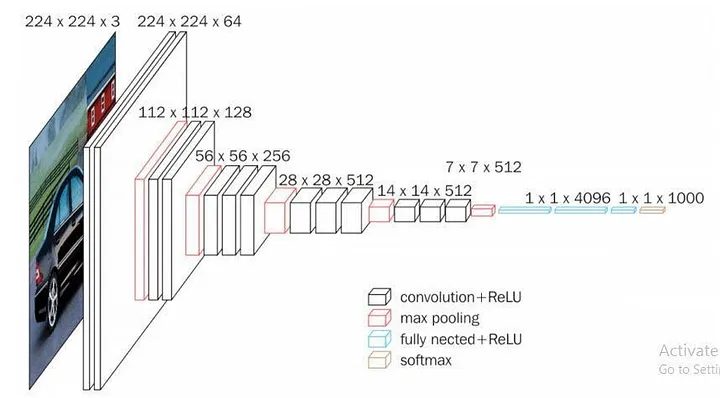

In [10]:
# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(),
    metrics=['accuracy']
)


In [11]:
# Train the model
history = model.fit(train_images_rgb, train_labels_one_hot, epochs=5, batch_size=64, validation_data=(test_images_rgb, test_labels_one_hot))

Epoch 1/5
938/938 [==============================] - 46s 35ms/step - loss: 0.2038 - accuracy: 0.9597 - val_loss: 0.0989 - val_accuracy: 0.9774
Epoch 2/5
938/938 [==============================] - 30s 32ms/step - loss: 0.0958 - accuracy: 0.9797 - val_loss: 0.0767 - val_accuracy: 0.9824
Epoch 3/5
938/938 [==============================] - 31s 33ms/step - loss: 0.0797 - accuracy: 0.9831 - val_loss: 0.0605 - val_accuracy: 0.9884
Epoch 4/5
938/938 [==============================] - 30s 32ms/step - loss: 0.0745 - accuracy: 0.9843 - val_loss: 0.0626 - val_accuracy: 0.9876
Epoch 5/5
938/938 [==============================] - 31s 33ms/step - loss: 0.0654 - accuracy: 0.9859 - val_loss: 0.0509 - val_accuracy: 0.9892


In [12]:
# Display the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 batch_normalization (Batch  (None, 32, 32, 64)        256       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 64)        256       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 64)        0         
 D)                                                              
                                                        

In [13]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images_rgb, test_labels_one_hot)
print(f'Test accuracy: {test_acc * 100:.2f}%')


313/313 [==============================] - 2s 7ms/step - loss: 0.0509 - accuracy: 0.9892
Test accuracy: 98.92%


In [14]:
# Make predictions
predictions = model.predict(test_images_rgb)

313/313 [==============================] - 1s 4ms/step


In [15]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

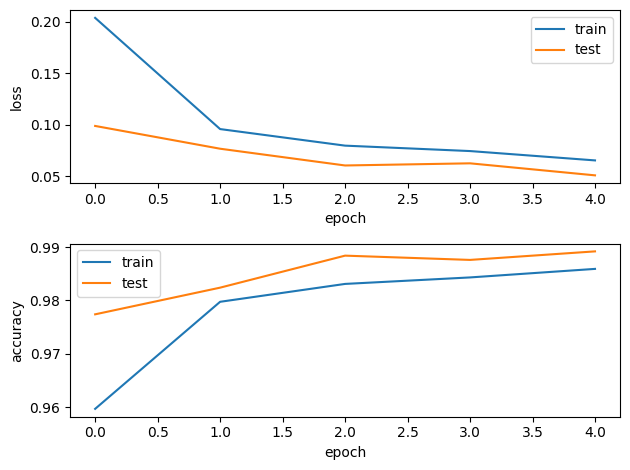

In [16]:
fig=plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','test'])
plt.subplot(2,1,2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])
plt.tight_layout()

In [17]:
# Make predictions
y_predicted = model.predict(test_images_rgb)

313/313 [==============================] - 1s 4ms/step


In [18]:
y_predicted=[np.argmax(i) for i in y_predicted]

In [19]:
y_predicted[:6]

[7, 2, 1, 0, 4, 1]

In [20]:
y_test=[np.argmax(i) for i in test_labels_one_hot]

In [21]:
np.array(y_test).shape

(10000,)

In [22]:
y_test[:6]

[7, 2, 1, 0, 4, 1]

In [23]:
con_matrix=confusion_matrix(y_test,y_predicted)

Text(0.5, 23.52222222222222, 'Predicted')

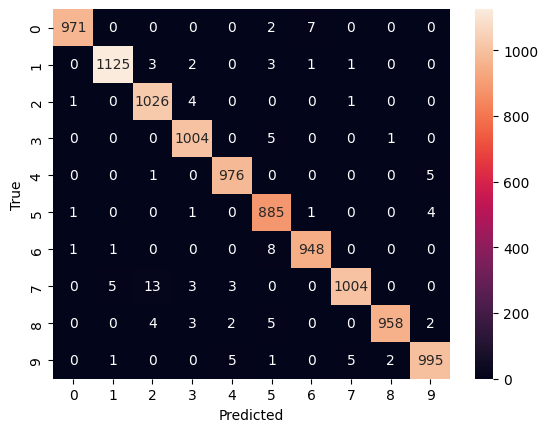

In [24]:
sns.heatmap(con_matrix,annot=True,fmt="d")
plt.ylabel('True')
plt.xlabel('Predicted')

In [25]:
CR=classification_report(y_test,y_predicted)
print(CR)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.97      0.99      0.98       892
           6       0.99      0.99      0.99       958
           7       0.99      0.98      0.98      1028
           8       1.00      0.98      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



Part2 VGG16(built_in)

In [26]:
# Load the pre-trained VGG-16 model (excluding the top Dense layers)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

58889256/58889256 [==============================] - 0s 0us/step


In [27]:
# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False


In [28]:
# Create a new model by adding custom Dense layers on top of the pre-trained base model
model = models.Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(4096, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

# model.add(layers.Dense(4096, activation='relu'))
# model.add(layers.BatchNormalization())
# model.add(layers.Dropout(0.5))
# model.add(layers.Dense(10, activation='softmax'))


In [29]:
# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(),
    metrics=['accuracy']
)

In [30]:
# Train the model
history = model.fit(train_images_rgb, train_labels_one_hot, epochs=5, batch_size=64, validation_data=(test_images_rgb, test_labels_one_hot))

Epoch 1/5
938/938 [==============================] - 16s 15ms/step - loss: 0.2540 - accuracy: 0.9248 - val_loss: 0.1677 - val_accuracy: 0.9488
Epoch 2/5
938/938 [==============================] - 14s 15ms/step - loss: 0.1781 - accuracy: 0.9473 - val_loss: 0.1519 - val_accuracy: 0.9569
Epoch 3/5
938/938 [==============================] - 13s 14ms/step - loss: 0.1642 - accuracy: 0.9507 - val_loss: 0.1523 - val_accuracy: 0.9538
Epoch 4/5
938/938 [==============================] - 14s 15ms/step - loss: 0.1555 - accuracy: 0.9532 - val_loss: 0.1424 - val_accuracy: 0.9566
Epoch 5/5
938/938 [==============================] - 13s 13ms/step - loss: 0.1473 - accuracy: 0.9567 - val_loss: 0.1049 - val_accuracy: 0.9688


In [31]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images_rgb, test_labels_one_hot)
print(f'Test accuracy: {test_acc * 100:.2f}%')

313/313 [==============================] - 3s 8ms/step - loss: 0.1049 - accuracy: 0.9688
Test accuracy: 96.88%
